# <center>Linear Regression

### Import libraries

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Linear Regression

We will start with the most familiar linear regression,fit a straight-line to data.

$
y = ax + b
$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

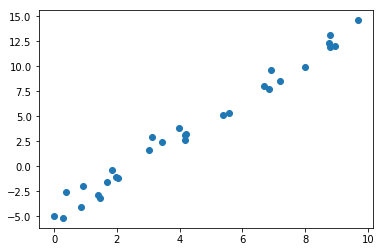

In [20]:
n = np.random.RandomState(1)
x = 10 * n.rand(30)
y = 2 * x - 5 + n.randn(30)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit a straight line to data and create the best-fit line:

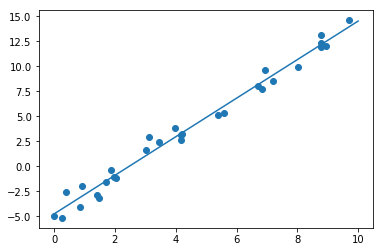

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``

In [18]:
print('model slope:-     ', model.coef_[0])
print('model intercept:- ', model.intercept_)

model slope:-      1.9292055341290573
model intercept:-  -4.760468351781977


### Considering another use case

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
data = pd.read_csv('data/student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [43]:
data.shape

(25, 2)

In [44]:
x_train, x_test, y_train,y_test = train_test_split(data['Hours'], data['Scores'], 
                                                   test_size=0.2, random_state=42)

In [46]:
x_train = np.reshape(x_train, (-1,1))

Exception: Data must be 1-dimensional

In [47]:
print('Train features: ', x_train.shape)
print('Train labels: ', y_train.shape)
print('Test features: ', x_test.shape)
print('Test labels: ', y_test.shape)

Train features:  (20,)
Train labels:  (20,)
Test features:  (5,)
Test labels:  (5,)


In [33]:
classifier = LinearRegression()

In [34]:
classifier.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[2.7 3.3 5.1 3.8 1.5 3.2 4.5 8.9 8.5 3.5 2.7 1.9 4.8 6.1 7.8 5.5 7.7 1.1
 7.4 9.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.